1. Construya la señal z(t) = x(t) + y(t) usando señales básicas

R=

z(t)=u(t+2)-u(t+1)+2[u(t-1)-u(t-2)]-2[u(t-2)-u(t-3)]

![Fig1.jpg](./Fig1.jpg)

---

 2. Grafique w(t) = z(t)*r(2(t + k) - 6)  Con k = 2(a+1) con a =1

 R=

 ![Fig2.jpg](./Fig2.jpg)

 ---

3.  Encontrar la transformada de Fourier de la siguiente señal

x(t)= 4 ∗sen(4πt + (π /4))+ k ∗ cos(8πt)+ 5 Con k = 2(a+1) con a =1

![Fig3_1.jpg](./Fig3_1.jpg)

![Fig3_2.jpg](./Fig3_2.jpg)

---



4.

La primera parte de la señal, $4 \cdot \sin(40\pi t + \frac{\pi}{4})$, tiene una frecuencia de $f_1 = \frac{40\pi}{2\pi} = 20 \, \text{Hz}$.

La segunda parte, $k \cdot \cos(80\pi t)$, tiene una frecuencia de $f_2 = \frac{80\pi}{2\pi} = 40 \, \text{Hz}$.

la frecuencia de muestreo debe ser al menos 2 veces la maxima, entonces 

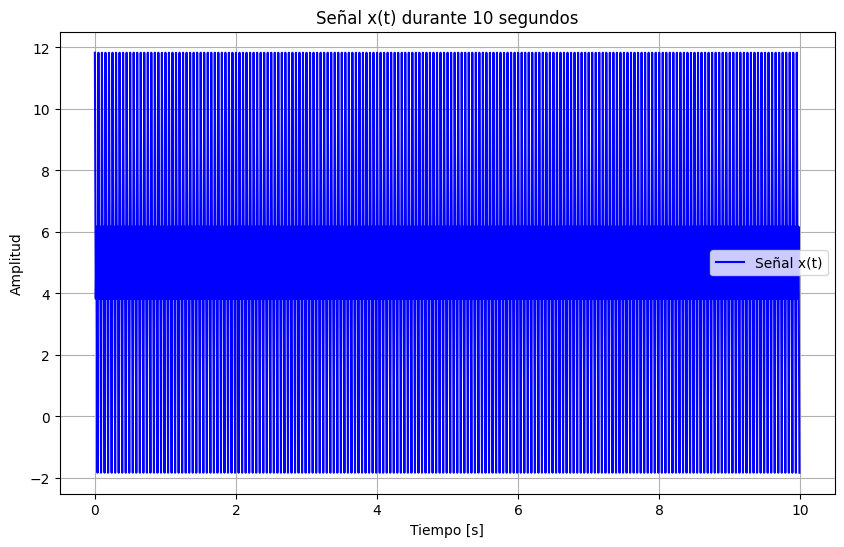

Muestras de la señal durante 10 segundos (primeras 10 muestras): [11.82842712  3.82842712  6.17157288 -1.82842712 11.82842712  3.82842712
  6.17157288 -1.82842712 11.82842712  3.82842712]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
a = 1
k = 2 * (a + 1)  # Calculamos el valor de k
fs = 80  # Frecuencia de muestreo (80 Hz)
T = 10  # Duración de la señal en segundos
t = np.arange(0, T, 1/fs)  # Vector de tiempo (10 segundos)

# Definición de la señal
x_t = 4 * np.sin(40 * np.pi * t + np.pi / 4) + k * np.cos(80 * np.pi * t) + 5

# Mostrar la señal y las muestras
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Señal x(t)', color='blue')
plt.title('Señal x(t) durante 10 segundos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

# Muestras de la señal
print(f'Muestras de la señal durante 10 segundos (primeras 10 muestras): {x_t[:10]}')


## 5 y 6

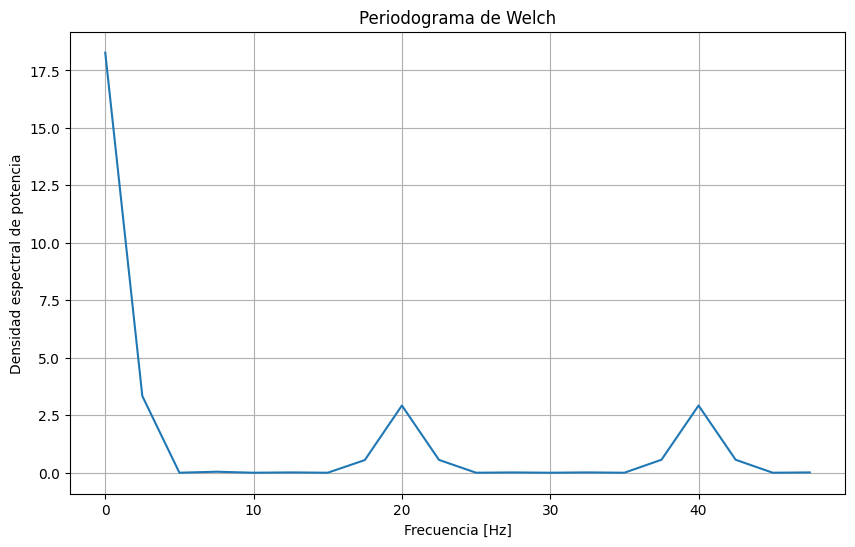

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la señal
def generar_senal(t, k):
    return 4 * np.sin(40 * np.pi * t + np.pi / 4) + k * np.cos(80 * np.pi * t) + 5

# Crear el periodograma de Welch
def periodograma_welch(x, M, S, ventana):
    # Número de segmentos
    N = len(x)
    N_seg = (N - M) // S + 1  # Número de segmentos

    # Inicializamos el array para el periodograma
    Pxx = np.zeros(M)  # Periodograma

    # Aplicamos el cálculo de la DFT para cada segmento
    for i in range(N_seg):
        # Obtener el segmento con solapamiento
        start = i * S
        segmento = x[start:start + M]

        # Multiplicar por la ventana Bartlett
        w = np.bartlett(M)  # Ventana Bartlett
        segmento_enventanado = segmento * w

        # Calcular la DFT del segmento
        X = np.fft.fft(segmento_enventanado)

        # Obtener el periodograma modificado (valor al cuadrado de la DFT)
        Pxx += np.abs(X) ** 2 / (M * np.sum(w ** 2))  # Normalización

    # Promediar los periodogramas
    Pxx /= N_seg
    return Pxx

# Parámetros de la señal y filtro
fs = 100  # Frecuencia de muestreo
T = 2  # Tiempo de la señal
t = np.arange(0, T, 1/fs)  # Vector de tiempo

k = 4  # Coeficiente k
x = generar_senal(t, k)

# Parámetros del periodograma de Welch
M = 40  # Número de muestras por segmento
S = 20  # Número de muestras de solapamiento

# Calcular el periodograma de Welch
Pxx = periodograma_welch(x, M, S, 'bartlett')

# Graficar el resultado
frecuencias = np.fft.fftfreq(M, 1/fs)  # Frecuencias correspondientes

plt.figure(figsize=(10, 6))
plt.plot(frecuencias[:M//2], Pxx[:M//2])  # Graficar solo las frecuencias positivas
plt.title('Periodograma de Welch')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()


 7. Una señal fisiológica definida en el rango entre a Hz y b Hz se toma con frecuencia de muestreo de 100 Hz. Para esta señal:

• Diseñar el filtro pasa-altas teniendo en cuenta que se requiere que en la banda de rechazo la señal de salida sea por lo menos 10 veces menor en amplitud a la señal de entrada

• Diseñar el filtro pasa-bajas teniendo en cuenta que se requiere que en la banda de rechazo la señal de salida sea por lo menos 100 veces menor en amplitud a la señal de entrada

Para diseñar el filtro pasa-altas, la especificación requiere que la atenuación en la banda de rechazo sea al menos -20 dB (es decir, la señal debe ser 10 veces más pequeña que la señal de entrada). Esto nos indica que el filtro debe tener una frecuencia de corte en torno a los 15 Hz. El orden del filtro se puede determinar utilizando la fórmula estándar de diseño de filtros digitales:

<img src="./Fig7.jpg" width="300" height="200">

donde:

* <span class="math-inline">A\_p</span>: Atenuación en la banda pasante (en dB).
* <span class="math-inline">A\_s</span>: Atenuación en la banda de rechazo (en dB).
* <span class="math-inline">f\_s</span>: Frecuencia de muestreo.
* <span class="math-inline">f\_0</span>: Frecuencia de corte.



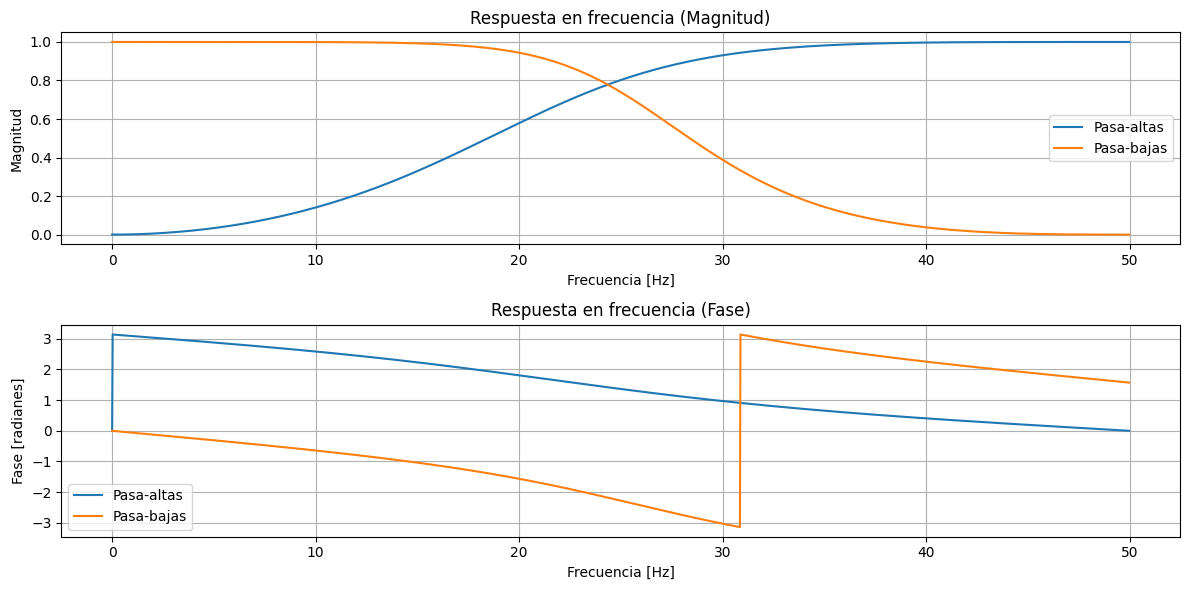

In [12]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parámetros de entrada
fs = 100  # Frecuencia de muestreo en Hz
f_a = 15  # Frecuencia de corte pasa-altas en Hz
f_b = 45  # Frecuencia de corte pasa-bajas en Hz

# Especificaciones de atenuación
A_p_altas = 0.5  # Atentuación en la banda pasante (en dB)
A_s_altas = 20  # Atentuación en la banda de rechazo (en dB)

A_p_bajas = 0.5  # Atentuación en la banda pasante (en dB)
A_s_bajas = 40  # Atentuación en la banda de rechazo (en dB)

# Calcular el orden y las frecuencias normalizadas
# Filtro pasa-altas
w_a = f_a / (fs / 2)  # Frecuencia de corte normalizada para pasa-altas
N_altas, Wn_altas = signal.buttord(w_a, w_a + 0.5, A_p_altas, A_s_altas)

# Filtro pasa-bajas
w_b = f_b / (fs / 2)  # Frecuencia de corte normalizada para pasa-bajas
N_bajas, Wn_bajas = signal.buttord(w_b - 0.5, w_b, A_p_bajas, A_s_bajas)

# Diseñar los filtros Butterworth
b_altas, a_altas = signal.butter(N_altas, Wn_altas, btype='high')
b_bajas, a_bajas = signal.butter(N_bajas, Wn_bajas, btype='low')

# Graficar el diagrama de magnitud y fase para pasa-altas
w, h_altas = signal.freqz(b_altas, a_altas, worN=2000)
w, h_bajas = signal.freqz(b_bajas, a_bajas, worN=2000)

plt.figure(figsize=(12, 6))

# Diagrama de magnitud
plt.subplot(2, 1, 1)
plt.plot(w * fs / (2 * np.pi), abs(h_altas), label="Pasa-altas")
plt.plot(w * fs / (2 * np.pi), abs(h_bajas), label="Pasa-bajas")
plt.title("Respuesta en frecuencia (Magnitud)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()

# Diagrama de fase
plt.subplot(2, 1, 2)
plt.plot(w * fs / (2 * np.pi), np.angle(h_altas), label="Pasa-altas")
plt.plot(w * fs / (2 * np.pi), np.angle(h_bajas), label="Pasa-bajas")
plt.title("Respuesta en frecuencia (Fase)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [radianes]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
